In [1]:
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3,3,4 ,1,1,2, 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
print (df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690


In [2]:
df.pivot_table(index='Team') # defult mean value of column

,Points,Rank,Year
Team,,,
Devils,768.000000,2.500000,2014.500000
Kings,761.666667,1.666667,2015.666667
Riders,762.250000,1.750000,2015.500000
Royals,752.500000,2.500000,2014.500000
kings,812.000000,4.000000,2015.000000


In [7]:
t=df.groupby('Team')
for i , j in t:
    print(i)
    print(j)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


In [5]:
g=t['Points'].sum()
g

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [8]:
type(g)

pandas.core.series.Series

In [9]:
h=pd.DataFrame(g)
h

,Points
Team,
Devils,1536
Kings,2285
Riders,3049
Royals,1505
kings,812


In [10]:
h.sort_values('Points',ascending=False).head(1)

,Points
Team,
Riders,3049


In [11]:
h[h.Points==h['Points'].max()]

,Points
Team,
Riders,3049


In [13]:
t2=df.groupby(['Team','Year'])
for i ,j in t2:
    print(i)
    print(j)

('Devils', 2014)
     Team  Rank  Year  Points
2  Devils     2  2014     863
('Devils', 2015)
     Team  Rank  Year  Points
3  Devils     3  2015     673
('Kings', 2014)
    Team  Rank  Year  Points
4  Kings     3  2014     741
('Kings', 2016)
    Team  Rank  Year  Points
6  Kings     1  2016     756
('Kings', 2017)
    Team  Rank  Year  Points
7  Kings     1  2017     788
('Riders', 2014)
     Team  Rank  Year  Points
0  Riders     1  2014     876
('Riders', 2015)
     Team  Rank  Year  Points
1  Riders     2  2015     789
('Riders', 2016)
     Team  Rank  Year  Points
8  Riders     2  2016     694
('Riders', 2017)
      Team  Rank  Year  Points
11  Riders     2  2017     690
('Royals', 2014)
     Team  Rank  Year  Points
9  Royals     4  2014     701
('Royals', 2015)
      Team  Rank  Year  Points
10  Royals     1  2015     804
('kings', 2015)
    Team  Rank  Year  Points
5  kings     4  2015     812


In [14]:
df.groupby(['Team','Year'])[['Points']].sum()

Points
Team   Year        
Devils 2014     863
       2015     673
Kings  2014     741
       2016     756
       2017     788
Riders 2014     876
       2015     789
       2016     694
       2017     690
Royals 2014     701
       2015     804
kings  2015     812

In [15]:
df.pivot_table(index='Team',columns='Year')

Points                      Rank               
Year     2014   2015   2016   2017 2014 2015 2016 2017
Team                                                  
Devils  863.0  673.0    NaN    NaN  2.0  3.0  NaN  NaN
Kings   741.0    NaN  756.0  788.0  3.0  NaN  1.0  1.0
Riders  876.0  789.0  694.0  690.0  1.0  2.0  2.0  2.0
Royals  701.0  804.0    NaN    NaN  4.0  1.0  NaN  NaN
kings     NaN  812.0    NaN    NaN  NaN  4.0  NaN  NaN

In [16]:
df.pivot_table(index='Team',columns='Year',aggfunc='count')

Points                Rank               
Year     2014 2015 2016 2017 2014 2015 2016 2017
Team                                            
Devils    1.0  1.0  NaN  NaN  1.0  1.0  NaN  NaN
Kings     1.0  NaN  1.0  1.0  1.0  NaN  1.0  1.0
Riders    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
Royals    1.0  1.0  NaN  NaN  1.0  1.0  NaN  NaN
kings     NaN  1.0  NaN  NaN  NaN  1.0  NaN  NaN

In [17]:
t=df['Team'].value_counts()
t

Team
Riders    4
Kings     3
Devils    2
Royals    2
kings     1
Name: count, dtype: int64

<Axes: xlabel='Team'>

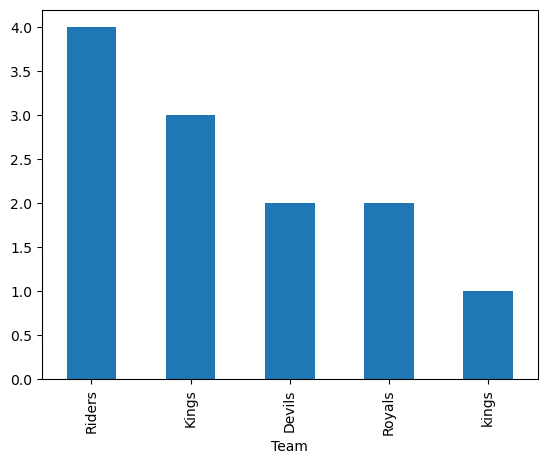

In [18]:
t.plot.bar()

<Axes: xlabel='Team', ylabel='count'>

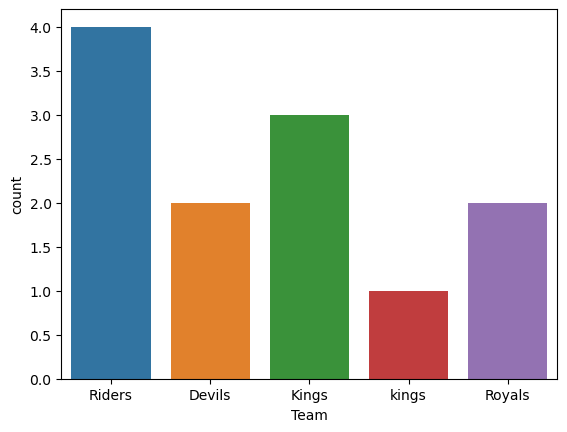

In [19]:
import seaborn as sns
sns.countplot(x='Team',data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

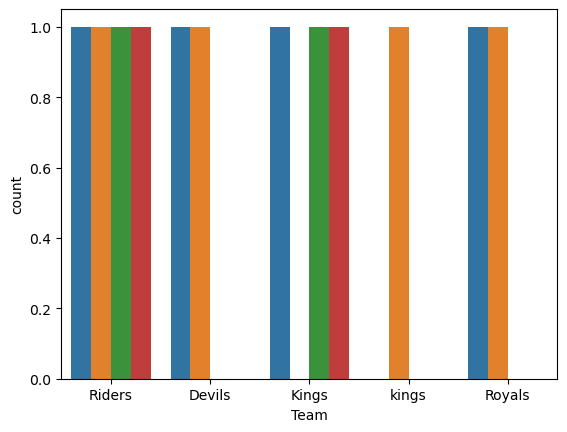

In [20]:
sns.countplot(x='Team',data=df,hue="Year")